<a href="https://colab.research.google.com/github/johnlukespeight/ML.Practice/blob/main/Stock_Market_Analysis_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
Import Kaggle data sources
Note:  This notebook environment differs from Kaggle's Python environment so there
may be missing libraries used by your notebook.
"""

import kagglehub
rpaguirre_tesla_stock_price_path = kagglehub.dataset_download('rpaguirre/tesla-stock-price')
camnugent_sandp500_path = kagglehub.dataset_download('camnugent/sandp500')
hershyandrew_amzn_dpz_btc_ntfx_adjusted_may_2013may2019_path = kagglehub.dataset_download('hershyandrew/amzn-dpz-btc-ntfx-adjusted-may-2013may2019')
tarunpaparaju_apple_aapl_historical_stock_data_path = kagglehub.dataset_download('tarunpaparaju/apple-aapl-historical-stock-data')

print('Data source import complete.')

100%|██████████| 33.7k/33.7k [00:00<00:00, 18.7MB/s]

Extracting files...


100%|██████████| 19.3M/19.3M [00:00<00:00, 34.5MB/s]

Extracting files...


100%|██████████| 29.7k/29.7k [00:00<00:00, 10.2MB/s]

Extracting files...


100%|██████████| 49.5k/49.5k [00:00<00:00, 41.8MB/s]

Extracting files...
Data source import complete.


# Time Series data - Stock Market Analysis

This notebook will focus on the stock market, in particular the tech stocks (Microsoft, Apple, Google, and Amazon).  This project has helped me familiarize with the Yahoo Finance API 'yfinance' by pulling stock information for visualization.  I was able to make predicitions of future stock prices through a Long Short Term Memory (LSTM).

Here are the initial questions that were answered in the sample kaggle notebook, and I expanded upon this with 5 addtional questions:

    1.) What was the change in price of the stock over time?
    2.) What was the daily return of the stock on average?
    3.) What was the moving average of the various stocks?
    4.) What was the coorelation betweeen different stocks?
    5.) How much value do we put at risk by investing in a particular stock?
    6.) How can we attempt to predict future stock behavior?
    7.)
    8.)
    9.)
    10.)

***

##Getting yfinance Data
The first step is to load the dataset into memory from the Yahoo Finance website. The yfinance library offers a threaded and Pythonic way to download market data from Yahoo.

[yfinance Blog](https://aroussi.com/post/python-yahoo-finance)



# 1. What was the change in price of the stock overtime?

In this section we will cover how we should handle requesting stock information with pandas, and analyze basic attributes of a stock.

In [ ]:
!pip install -q yfinance
!pip install yfinance --upgrade --no-cache-dir
!pip install streamlit pandas numpy matplotlib seaborn yfinance pandas_datareader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 59.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 3.0 MB/s eta 0:00:00


In [ ]:
# 1. First, let's verify the data download process
import yfinance as yf
from datetime import datetime, timedelta

# Set the date range
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Download Tesla data specifically and verify
tesla = yf.download('TSLA', start=start, end=end)
print("Tesla data shape:", tesla.shape)
print("\nFirst few rows of Tesla data:")
print(tesla.head())

# If the above works, let's modify how we store the data
tech_list = ['TSLA', 'GOOG', 'MSFT', 'AMZN']
company_name = ["Tesla", "Google", "Microsoft", "Amazon"]

# Create dictionary to store DataFrames
stock_data = {}

# Download and store data with error handling
for stock, name in zip(tech_list, company_name):
    try:
        print(f"\nDownloading data for {name} ({stock})...")
        df = yf.download(stock, start=start, end=end)
        if df.empty:
            print(f"No data downloaded for {name}")
        else:
            print(f"Downloaded {len(df)} rows of data for {name}")
            stock_data[stock] = df
    except Exception as e:
        print(f"Error downloading {name} data: {str(e)}")

# Verify the data
for stock in stock_data:
    print(f"\n{stock} data shape:", stock_data[stock].shape)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Tesla data shape: (252, 6)

First few rows of Tesla data:
Price                       Adj Close       Close        High         Low  \
Ticker                           TSLA        TSLA        TSLA        TSLA   
Date                                                                        
2023-11-20 00:00:00+00:00  235.600006  235.600006  237.100006  231.020004   
2023-11-21 00:00:00+00:00  241.199997  241.199997  243.619995  233.339996   
2023-11-22 00:00:00+00:00  234.210007  234.210007  244.009995  231.399994   
2023-11-24 00:00:00+00:00  235.449997  235.449997  238.750000  232.330002   
2023-11-27 00:00:00+00:00  236.080002  236.080002  238.330002  232.100006   

Price                            Open     Volume  
Ticker                           TSLA       TSLA  
Date                                              
2023-11-20 00:00:00+00:00  234.039993  116320100  
2023-11-21 00:00:00+00:00  235.039993  122288000  
2023-11-22 00:00:00+00:00  242.039993  117950600  
2023-11-24 00:00:00

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Downloaded 252 rows of data for Microsoft

Downloaded 252 rows of data for Amazon

TSLA data shape: (252, 6)

GOOG data shape: (252, 6)

MSFT data shape: (252, 6)

AMZN data shape: (252, 6)


In [ ]:
AMZN.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN,AMZN
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,176.843571,176.843571,178.578095,174.902818,176.822246,4.207071e+07
std,15.621594,15.621594,15.872056,15.491069,15.798530,1.669136e+07
min,143.899994,143.899994,144.050003,141.500000,143.550003,9.416900e+06
25%,169.829998,169.829998,170.932499,167.290001,169.205006,3.136832e+07
50%,179.770004,179.770004,181.599998,178.049995,180.100006,3.876635e+07
75%,186.524998,186.524998,188.444996,184.872498,187.012501,4.677342e+07
max,214.100006,214.100006,215.899994,210.880005,214.160004,1.414484e+08


In [ ]:
TSLA.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,213.673095,213.673095,217.998968,209.268293,213.589842,9.811851e+07
std,38.157998,38.157998,39.218492,36.905101,38.086015,3.342254e+07
min,142.050003,142.050003,144.440002,138.800003,140.559998,4.246573e+07
25%,180.004997,180.004997,184.504997,176.980000,181.950001,7.417175e+07
50%,210.695000,210.695000,216.005005,207.654999,212.070000,9.278460e+07
75%,240.502499,240.502499,245.372501,236.447506,241.527504,1.146468e+08
max,350.000000,350.000000,358.640015,336.000000,346.299988,2.438697e+08


In [ ]:
GOOG.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,159.817143,160.076032,161.616464,158.574651,160.019588,1.984265e+07
std,15.857010,15.808469,15.969715,15.707539,15.862351,8.353998e+06
min,130.309982,130.630005,131.449997,129.399994,130.369995,4.599675e+06
25%,144.859241,145.214996,146.545002,143.984997,145.285000,1.467198e+07
50%,163.025002,163.065002,164.769997,161.305000,163.105003,1.773920e+07
75%,172.579670,172.659996,174.139503,170.512997,172.059998,2.177198e+07
max,192.406723,192.660004,193.309998,190.619995,191.750000,5.972800e+07


In [ ]:
MSFT.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT,MSFT
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,412.540784,413.588790,416.735635,410.064206,413.699512,2.112099e+07
std,22.171471,21.718399,21.899601,21.584537,21.883945,8.288372e+06
min,363.940948,365.929993,369.519989,362.899994,366.450012,4.384264e+06
25%,402.446503,404.027496,408.037491,401.844986,404.357498,1.621082e+07
50%,414.816193,415.389999,418.375000,412.095001,415.635010,1.924950e+07
75%,424.760208,425.362495,428.527512,421.735001,425.512505,2.318682e+07
max,466.718781,467.559998,468.350006,464.459991,467.000000,7.847820e+07


## Information about the data

`.info()` method prints information about a pandas dataframe including the index `dtype` and columns, non-null values, and memory usage.

In [ ]:
# General Info

TSLA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-11-20 00:00:00+00:00 to 2024-11-19 00:00:00+00:00
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, TSLA)  252 non-null    float64
 1   (Close, TSLA)      252 non-null    float64
 2   (High, TSLA)       252 non-null    float64
 3   (Low, TSLA)        252 non-null    float64
 4   (Open, TSLA)       252 non-null    float64
 5   (Volume, TSLA)     252 non-null    int64  
 6   (company_name, )   252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1463: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))
/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:895: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))
/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1463: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))
/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:754: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))
/usr/local/

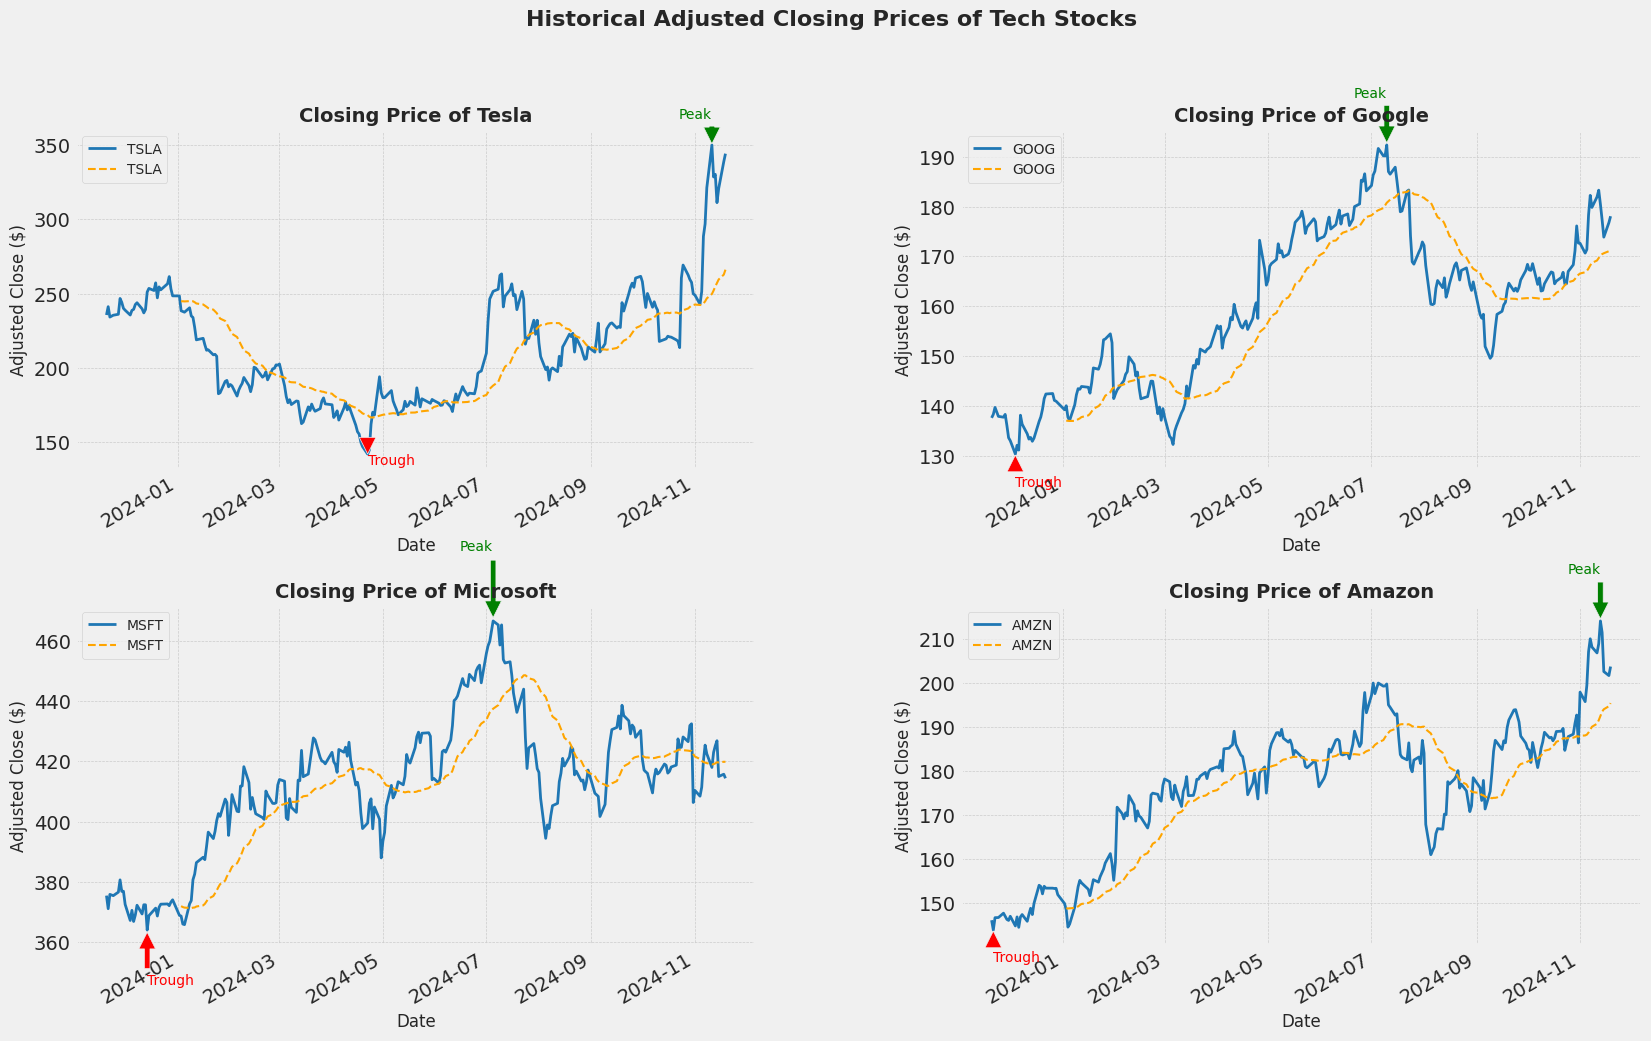

In [ ]:
# Historical View of the Adjusted Closing Prices for Tech Stocks

import matplotlib.pyplot as plt

# Set the overall figure size for better visibility
plt.figure(figsize=(18, 12))

# Adjust the spacing between subplots to prevent overlap
plt.subplots_adjust(hspace=0.4, wspace=0.3)

company_list = [stock_data[symbol] for symbol in tech_list]

# Iterate over each company and its corresponding name
for i, (company, name) in enumerate(zip(company_list, company_name), 1):
    # Create a subplot in a 2x2 grid
    ax = plt.subplot(2, 2, i)

    # Plot the Adjusted Close price for the current company
    company['Adj Close'].plot(ax=ax, color='tab:blue', linewidth=2)

    # Add grid lines to the subplot for better readability
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Set the title of the subplot to include the company's name
    ax.set_title(f"Closing Price of {name}", fontsize=14, fontweight='bold')

    # Label the y-axis to indicate the metric being displayed
    ax.set_ylabel('Adjusted Close ($)', fontsize=12)

    # Label the x-axis and rotate the date labels for clarity
    ax.set_xlabel('Date', fontsize=12)
    ax.tick_params(axis='x', rotation=45)

    # Identify the peak (highest) adjusted close price
    peak_date = company['Adj Close'].idxmax()
    peak_price = company['Adj Close'].max()

    # Annotate the peak on the plot with an arrow and label
    ax.annotate('Peak',
                xy=(peak_date, peak_price),
                xytext=(peak_date, peak_price * 1.05),
                arrowprops=dict(facecolor='green', shrink=0.05),
                horizontalalignment='right',
                fontsize=10,
                color='green')

    # Identify the trough (lowest) adjusted close price
    trough_date = company['Adj Close'].idxmin()
    trough_price = company['Adj Close'].min()

    # Annotate the trough on the plot with an arrow and label
    ax.annotate('Trough',
                xy=(trough_date, trough_price),
                xytext=(trough_date, trough_price * 0.95),
                arrowprops=dict(facecolor='red', shrink=0.05),
                horizontalalignment='left',
                fontsize=10,
                color='red')

    # Calculate and plot the 30-day moving average to highlight trends
    company['Adj Close'].rolling(window=30).mean().plot(
        ax=ax,
        color='orange',
        linestyle='--',
        linewidth=1.5,
        label='30-Day MA'
    )

    # Add a legend to differentiate between the raw data and the moving average
    ax.legend(loc='upper left', fontsize=10)

# Add an overarching title for all subplots to provide context
plt.suptitle('Historical Adjusted Closing Prices of Tech Stocks', fontsize=16, fontweight='bold')

# Display the complete set of plots
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import torch
from torch.utils.data import DataLoader, TensorDataset

# Assuming 'df' is your DataFrame with stock prices
data = df['Close'].values  # Use the 'Close' prices
data = data.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create sequences
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60  # Number of previous days to consider
X, y = create_dataset(scaled_data, time_step)

# Convert to PyTorch tensors
X = torch.FloatTensor(X).view(-1, time_step, 1)
y = torch.FloatTensor(y)

# Create DataLoader
dataset = TensorDataset(X, y)
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)

KeyError: 'Close'

In [ ]:
import torch.nn as nn

class LSTMModel(nn.Module):
    def __init__(self):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=50, num_layers=2, batch_first=True)
        self.fc = nn.Linear(50, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])  # Get the last time step
        return out

# Instantiate the model
model = LSTMModel()

In [ ]:
import torch.optim as optim

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()  # Zero the gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels.view(-1, 1))  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 0.0190
Epoch [20/100], Loss: 0.0122
Epoch [30/100], Loss: 0.0081
Epoch [40/100], Loss: 0.0072
Epoch [50/100], Loss: 0.0045
Epoch [60/100], Loss: 0.0061
Epoch [70/100], Loss: 0.0042
Epoch [80/100], Loss: 0.0014
Epoch [90/100], Loss: 0.0037
Epoch [100/100], Loss: 0.0014


In [ ]:
# Make predictions
model.eval()  # Set the model to evaluation mode
train_predict = model(X)  # Get predictions on the training data

# Inverse transform the predictions and actual values
train_predict = scaler.inverse_transform(train_predict.detach().numpy())
actual_prices = scaler.inverse_transform(y.detach().numpy().reshape(-1, 1))

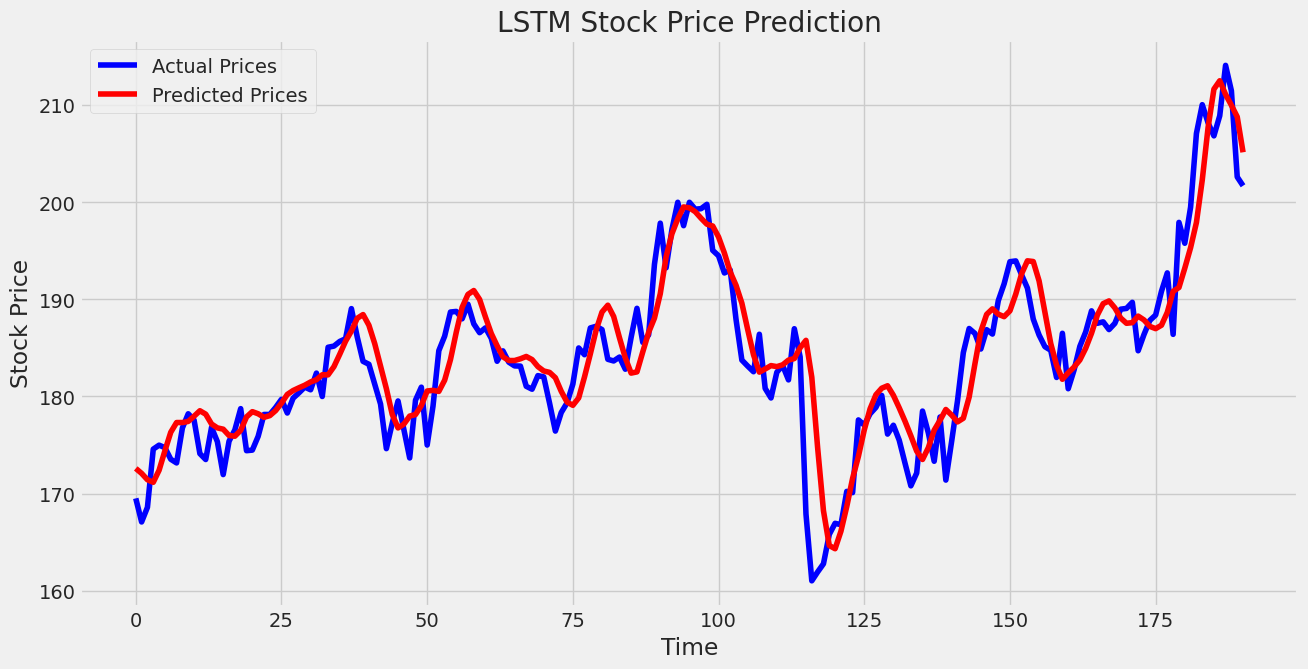

In [ ]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(actual_prices, label='Actual Prices', color='blue')
plt.plot(train_predict, label='Predicted Prices', color='red')
plt.title('LSTM Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
X = X.to(device)

# List of companies to visualize
selected_companies = ['GOOG', 'TSLA', 'AMZN', 'MSFT']

# Create a dictionary to store predictions for each company
predictions = {}

for company in selected_companies:
    # Get the corresponding DataFrame for the company
    df_company = stock_data[company]

    # Prepare the data (similar to previous steps)
    data = df_company['Close'].values.reshape(-1, 1)
    scaled_data = scaler.fit_transform(data)

    # Create sequences
    X, y = create_dataset(scaled_data, time_step)
    X = torch.FloatTensor(X).view(-1, time_step, 1)

    # Move data to the appropriate device
    X = X.to(device)
    y = torch.FloatTensor(y).to(device)

    # Make predictions
    model.eval()
    with torch.no_grad():
        train_predict = model(X)

    # Inverse transform the predictions
    train_predict = train_predict.cpu().detach().numpy()  # Move to CPU, detach, and convert to NumPy
    train_predict = scaler.inverse_transform(train_predict)

    actual_prices = y.cpu().detach().numpy().reshape(-1, 1)  # Move to CPU, detach, and convert to NumPy
    actual_prices = scaler.inverse_transform(actual_prices)

    # Store predictions and actual prices
    predictions[company] = (actual_prices, train_predict)


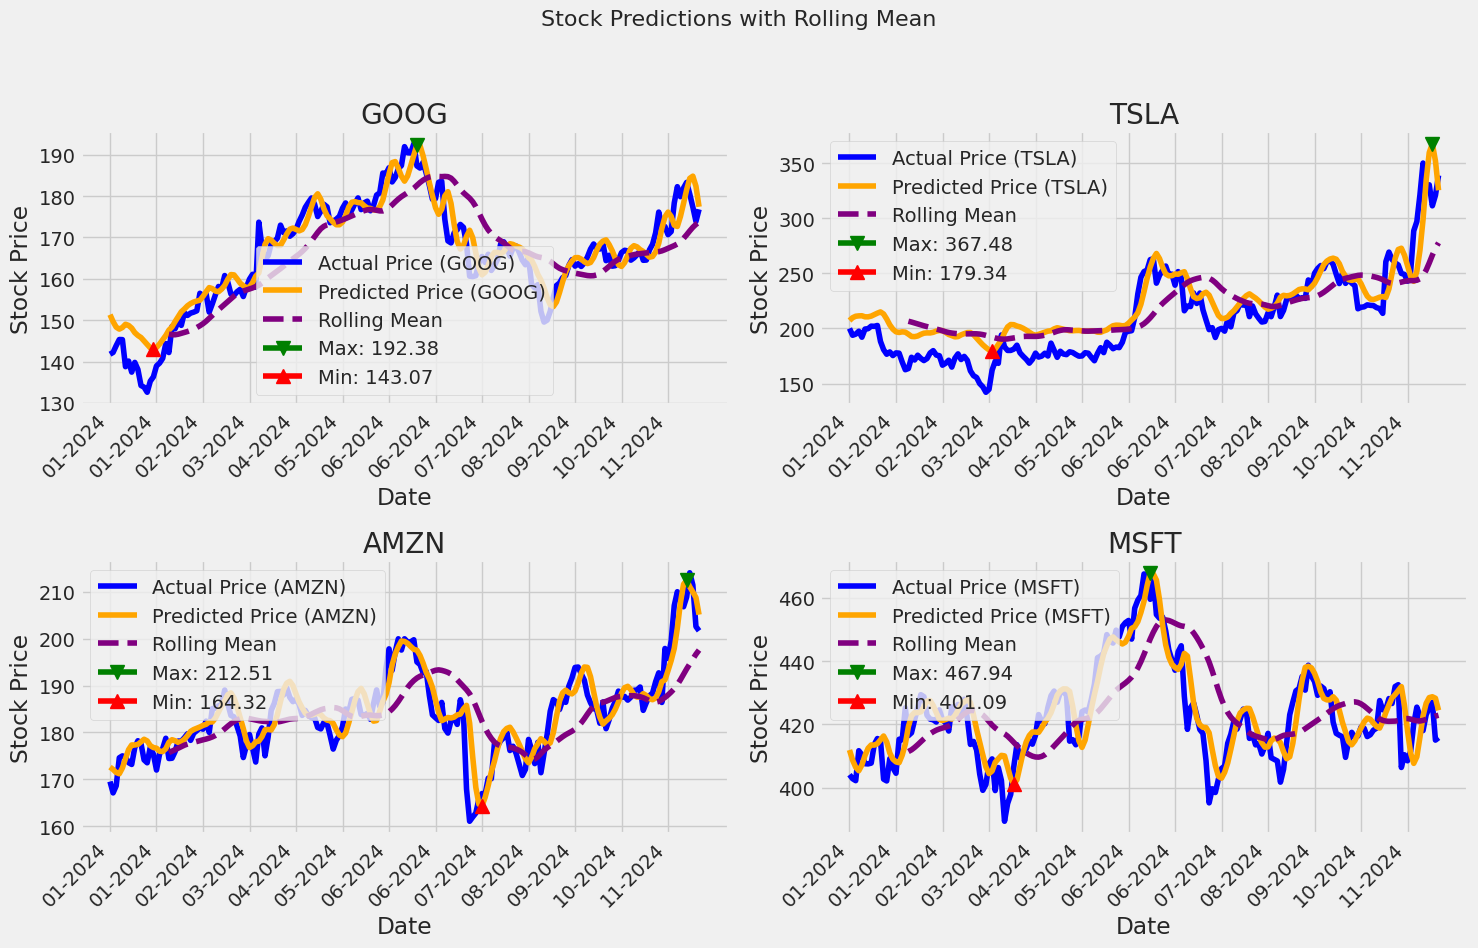

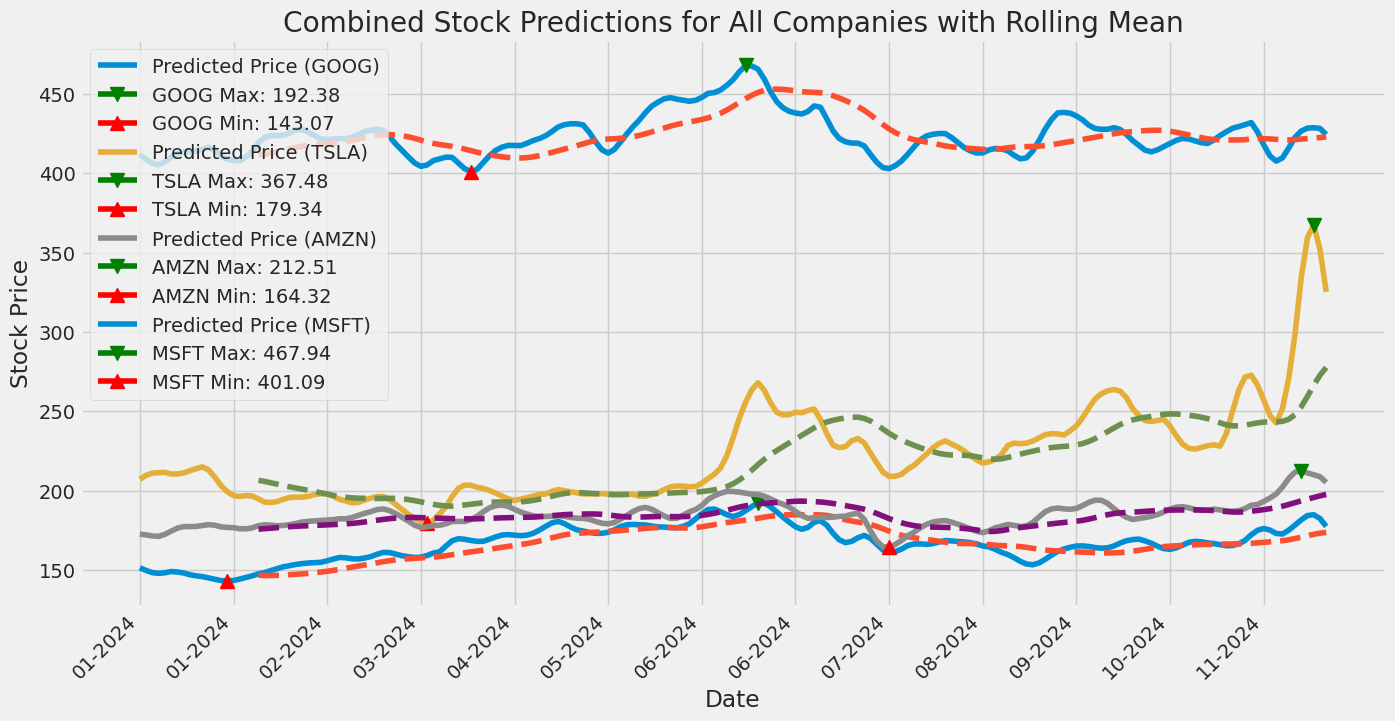

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

# Define the rolling window
rolling_window = 20

# Define date range from 01-01-24 to current date
start_date = datetime(2024, 1, 1)
current_date = datetime.now()
date_range = pd.date_range(start=start_date, end=current_date, periods=len(predictions[selected_companies[0]][0]))

# Function to format x-axis labels with 12 points for the months in the year
def format_month_labels(dates):
    labels = []
    step = max(1, len(dates) // 12)
    for i, date in enumerate(dates):
        if i % step == 0:
            labels.append(date.strftime("%m-%Y"))
        else:
            labels.append('')
    return labels

# Plotting each company individually
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Stock Predictions with Rolling Mean', fontsize=16)

for i, company in enumerate(selected_companies):
    actual_prices, train_predict = predictions[company]

    # Rolling Mean Calculation
    rolling_mean = np.convolve(train_predict.flatten(), np.ones(rolling_window) / rolling_window, mode='valid')

    # Finding the max and min values
    max_index = train_predict.argmax()
    min_index = train_predict.argmin()

    # Create a DataFrame for easier indexing
    df = pd.DataFrame({'Date': date_range, 'Actual': actual_prices.flatten(), 'Predicted': train_predict.flatten()})

    # Set current subplot
    ax = axs[i // 2, i % 2]
    ax.plot(df['Date'], df['Actual'], label=f'Actual Price ({company})', color='blue')
    ax.plot(df['Date'], df['Predicted'], label=f'Predicted Price ({company})', color='orange')
    ax.plot(df['Date'][rolling_window - 1:], rolling_mean, label='Rolling Mean', color='purple', linestyle='--')

    # Plot the max value with a green triangle and min value with a red triangle, including stock price
    ax.plot(df['Date'][max_index], train_predict[max_index], marker='v', color='green', markersize=10, label=f'Max: {train_predict[max_index][0]:.2f}')
    ax.plot(df['Date'][min_index], train_predict[min_index], marker='^', color='red', markersize=10, label=f'Min: {train_predict[min_index][0]:.2f}')

    ax.set_title(company)
    ax.set_xlabel('Date')
    ax.set_ylabel('Stock Price')
    ax.set_xticks(df['Date'][::len(df)//12])  # Set 12 points for the months in the year
    ax.set_xticklabels(format_month_labels(df['Date'][::len(df)//12]), rotation=45, ha='right')
    ax.legend()
    ax.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Combined Plot for All Companies
plt.figure(figsize=(15, 7))
plt.title('Combined Stock Predictions for All Companies with Rolling Mean')

for company in selected_companies:
    actual_prices, train_predict = predictions[company]

    # Rolling Mean Calculation
    rolling_mean = np.convolve(train_predict.flatten(), np.ones(rolling_window) / rolling_window, mode='valid')

    # Create a DataFrame for easier indexing
    df = pd.DataFrame({'Date': date_range, 'Actual': actual_prices.flatten(), 'Predicted': train_predict.flatten()})

    # Plotting
    plt.plot(df['Date'], df['Predicted'], label=f'Predicted Price ({company})')
    plt.plot(df['Date'][rolling_window - 1:], rolling_mean, linestyle='--')

    # Plot the max and min values
    max_index = train_predict.argmax()
    min_index = train_predict.argmin()
    plt.plot(df['Date'][max_index], train_predict[max_index], marker='v', color='green', markersize=10, label=f'{company} Max: {train_predict[max_index][0]:.2f}')
    plt.plot(df['Date'][min_index], train_predict[min_index], marker='^', color='red', markersize=10, label=f'{company} Min: {train_predict[min_index][0]:.2f}')

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.xticks(df['Date'][::len(df)//12], format_month_labels(df['Date'][::len(df)//12]), rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.show()